Header Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Load Dataset

In [3]:
df = pd.read_csv("FINAL_USO.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


Preprocessing

In [4]:
df = df.drop(columns=['Date'])   # Remove non-numeric column

Correlation Matrix

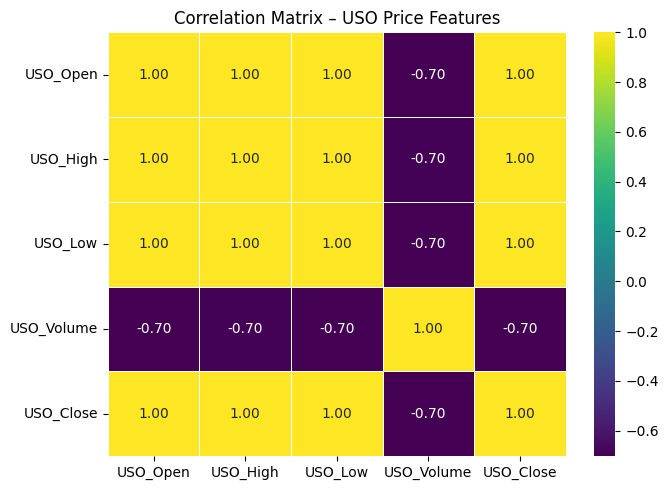

In [14]:
corr_cols = ['USO_Open', 'USO_High', 'USO_Low', 'USO_Volume', 'USO_Close']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='viridis',   # clean color palette
    fmt='.2f',
    linewidths=0.5
)
plt.title("Correlation Matrix – USO Price Features")
plt.tight_layout()
plt.show()

Select Features & Target

In [15]:
X = df[['USO_Open', 'USO_High', 'USO_Low', 'USO_Volume']]
y = df['USO_Close']

Train–Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train Linear Regression Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Prediction & Evaluation

In [8]:
y_pred = model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
print("R²  :", r2_score(y_test, y_pred))


MAE : 0.08195240324719291
RMSE: 0.1127806120934939
R²  : 0.9999047482969243


Actual vs Predicted Plot

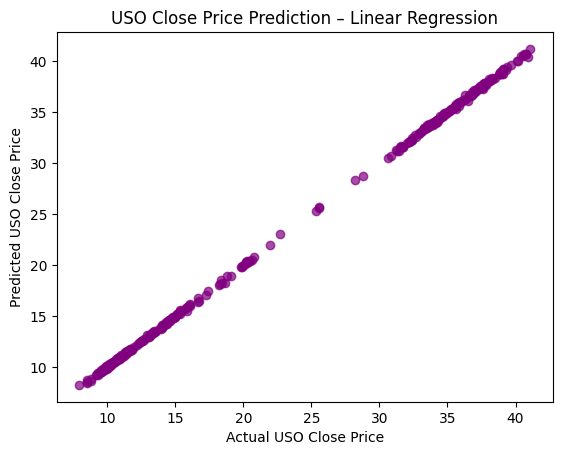

In [13]:
plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
plt.xlabel("Actual USO Close Price")
plt.ylabel("Predicted USO Close Price")
plt.title("USO Close Price Prediction – Linear Regression")
plt.show()
